<a href="https://colab.research.google.com/github/AnanyaTyagi08/Credit-Predictor/blob/main/Statlog(German_Credit)CS375_nandika.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pre-Processing

In [1]:
!pip install ucimlrepo
from ucimlrepo import fetch_ucirepo

# fetch dataset
statlog_german_credit_data = fetch_ucirepo(id=144)

# data (as pandas dataframes)
X = statlog_german_credit_data.data.features
y = statlog_german_credit_data.data.targets

# metadata
print(statlog_german_credit_data.metadata)

# variable information
print(statlog_german_credit_data.variables)



{'uci_id': 144, 'name': 'Statlog (German Credit Data)', 'repository_url': 'https://archive.ics.uci.edu/dataset/144/statlog+german+credit+data', 'data_url': 'https://archive.ics.uci.edu/static/public/144/data.csv', 'abstract': 'This dataset classifies people described by a set of attributes as good or bad credit risks. Comes in two formats (one all numeric). Also comes with a cost matrix', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 1000, 'num_features': 20, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Other', 'Marital Status', 'Age', 'Occupation'], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1994, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5NC77', 'creators': ['Hans Hofmann'], 'intro_paper': None, 'additional_info': {'summary': 'Two datasets are provided.  the original dataset, in the form provided by

In [2]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt

X.head()

,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute9,Attribute10,Attribute11,Attribute12,Attribute13,Attribute14,Attribute15,Attribute16,Attribute17,Attribute18,Attribute19,Attribute20
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,4,A121,67,A143,A152,2,A173,1,A192,A201
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,2,A121,22,A143,A152,1,A173,1,A191,A201
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,3,A121,49,A143,A152,1,A172,2,A191,A201
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,4,A122,45,A143,A153,1,A173,2,A191,A201
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,4,A124,53,A143,A153,2,A173,2,A191,A201


In [3]:
y.head()
#1 = Good, 2 = Bad

,class
0,1
1,2
2,1
3,1
4,2


In [ ]:
# Tells us a little more about the distrubution of the target value
y.describe()

,class
count,1000.000000
mean,1.300000
std,0.458487
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,2.000000


In [ ]:
y.info()
# this tells us that there are no null values therefore don't need to get rid of null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   class   1000 non-null   int64
dtypes: int64(1)
memory usage: 7.9 KB


In [ ]:
X.info()
# this tells us that there are no null values therefore don't need to get rid of null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Attribute1   1000 non-null   object
 1   Attribute2   1000 non-null   int64 
 2   Attribute3   1000 non-null   object
 3   Attribute4   1000 non-null   object
 4   Attribute5   1000 non-null   int64 
 5   Attribute6   1000 non-null   object
 6   Attribute7   1000 non-null   object
 7   Attribute8   1000 non-null   int64 
 8   Attribute9   1000 non-null   object
 9   Attribute10  1000 non-null   object
 10  Attribute11  1000 non-null   int64 
 11  Attribute12  1000 non-null   object
 12  Attribute13  1000 non-null   int64 
 13  Attribute14  1000 non-null   object
 14  Attribute15  1000 non-null   object
 15  Attribute16  1000 non-null   int64 
 16  Attribute17  1000 non-null   object
 17  Attribute18  1000 non-null   int64 
 18  Attribute19  1000 non-null   object
 19  Attribute20  1000 non-null  

In [ ]:
type(y)
type(X)
#Both X and y are already dataframes

pandas.core.frame.DataFrame

In [5]:
# Dropping the rows and columns with missing data (this dataset has no missing values so in this case this step is optional).
# X_df = pd.DataFrame(X)
# y_df = pd.DataFrame(y, columns=['Target'])


#'class' is our target

data_combined = pd.concat([X, y], axis=1)

data_combined.head()

,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute9,Attribute10,...,Attribute12,Attribute13,Attribute14,Attribute15,Attribute16,Attribute17,Attribute18,Attribute19,Attribute20,class
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


In [ ]:
#To check if there are no missing values.
print(data_combined.isnull().sum())

Attribute1     0
Attribute2     0
Attribute3     0
Attribute4     0
Attribute5     0
Attribute6     0
Attribute7     0
Attribute8     0
Attribute9     0
Attribute10    0
Attribute11    0
Attribute12    0
Attribute13    0
Attribute14    0
Attribute15    0
Attribute16    0
Attribute17    0
Attribute18    0
Attribute19    0
Attribute20    0
class          0
dtype: int64


In [ ]:
print(data_combined.columns)

Index(['Status of existing checking account', 'Duration', 'Credit history',
       'Purpose', 'Credit amount', 'Savings account/bonds',
       'Present employment since',
       'Installment rate in percentage of disposable income',
       'Personal status and sex', 'Other debtors / guarantors',
       'Present residence since', 'Property', 'Age', 'Other installment plans',
       'Housing', 'Number of existing credits at this bank', 'Job',
       'Number of people being liable to provide maintenance for', 'Telephone',
       'foreign worker', 'Target'],
      dtype='object')


In [8]:
attribute_names = [
    'Status of existing checking account', 'Duration', 'Credit history',
    'Purpose', 'Credit amount', 'Savings account/bonds', 'Present employment since',
    'Installment rate in percentage of disposable income', 'Personal status and sex',
    'Other debtors / guarantors', 'Present residence since', 'Property',
    'Age', 'Other installment plans', 'Housing',
    'Number of existing credits at this bank', 'Job',
    'Number of people being liable to provide maintenance for',
    'Telephone', 'foreign worker', 'Target'
]

data_combined.columns = attribute_names

In [ ]:
data_combined

,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute9,Attribute10,...,Attribute12,Attribute13,Attribute14,Attribute15,Attribute16,Attribute17,Attribute18,Attribute19,Attribute20,class
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,A14,12,A32,A42,1736,A61,A74,3,A92,A101,...,A121,31,A143,A152,1,A172,1,A191,A201,1
996,A11,30,A32,A41,3857,A61,A73,4,A91,A101,...,A122,40,A143,A152,1,A174,1,A192,A201,1
997,A14,12,A32,A43,804,A61,A75,4,A93,A101,...,A123,38,A143,A152,1,A173,1,A191,A201,1
998,A11,45,A32,A43,1845,A61,A73,4,A93,A101,...,A124,23,A143,A153,1,A173,1,A192,A201,2


In [9]:
import pandas as pd

for col in data_combined.select_dtypes(include=['float64', 'int64']).columns:
    Q1 = data_combined[col].quantile(0.25)
    Q3 = data_combined[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = data_combined[(data_combined[col] < lower_bound) | (data_combined[col] > upper_bound)]

    print(f"Outliers detected in {col}: {outliers.shape[0]}")

    # df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]


Outliers detected in Duration: 70
Outliers detected in Credit amount: 72
Outliers detected in Installment rate in percentage of disposable income: 0
Outliers detected in Present residence since: 0
Outliers detected in Age: 23
Outliers detected in Number of existing credits at this bank: 6
Outliers detected in Number of people being liable to provide maintenance for: 155
Outliers detected in Target: 0


In [10]:
#Encoding
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

#Encoding the target variable first
# One hot encoding makes the most sense for our dataset because it allows us to convert our categorical variables into numerical ones which are essential for future steps. Also, our dataset doesn't inherently contain any ordering, which is also why we chose to use one hot encoding.
# OUR TARGET VARIABLE IS ALREADY ENCODED therefore no need for the following line
# data_combined['Target'] = label_encoder.fit_transform(data_combined['Target'])


#Encoding all the other columns which are categorical
'''df = pd.get_dummies(data_combined, columns=['Attribute1', 'Attribute3', 'Attribute4', 'Attribute6', 'Attribute7', 'Attribute9',
                                 'Attribute10', 'Attribute12', 'Attribute14',
                               'Attribute15', 'Attribute17', 'Attribute19', 'Attribute20'])'''

data_combined = pd.get_dummies(data_combined, columns=['Status of existing checking account', 'Credit history', 'Purpose',
    'Savings account/bonds', 'Present employment since', 'Personal status and sex',
    'Other debtors / guarantors', 'Property', 'Other installment plans',
    'Housing', 'Job', 'Telephone', 'foreign worker'])


In [ ]:
data_combined

,Duration,Credit amount,Installment rate in percentage of disposable income,Present residence since,Age,Number of existing credits at this bank,Number of people being liable to provide maintenance for,Target,Status of existing checking account_A11,Status of existing checking account_A12,...,Housing_A152,Housing_A153,Job_A171,Job_A172,Job_A173,Job_A174,Telephone_A191,Telephone_A192,foreign worker_A201,foreign worker_A202
0,6,1169,4,4,67,2,1,1,True,False,...,True,False,False,False,True,False,False,True,True,False
1,48,5951,2,2,22,1,1,2,False,True,...,True,False,False,False,True,False,True,False,True,False
2,12,2096,2,3,49,1,2,1,False,False,...,True,False,False,True,False,False,True,False,True,False
3,42,7882,2,4,45,1,2,1,True,False,...,False,True,False,False,True,False,True,False,True,False
4,24,4870,3,4,53,2,2,2,True,False,...,False,True,False,False,True,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,12,1736,3,4,31,1,1,1,False,False,...,True,False,False,True,False,False,True,False,True,False
996,30,3857,4,4,40,1,1,1,True,False,...,True,False,False,False,False,True,False,True,True,False
997,12,804,4,4,38,1,1,1,False,False,...,True,False,False,False,True,False,True,False,True,False
998,45,1845,4,4,23,1,1,2,True,False,...,False,True,False,False,True,False,False,True,True,False


In [11]:
# To make it consistent, we are converting all boolean types to ints as well (1 = True, 0 = False)
data_combined = data_combined.astype({col: 'int' for col in data_combined.select_dtypes('bool').columns})

In [ ]:
data_combined

,Duration,Credit amount,Installment rate in percentage of disposable income,Present residence since,Age,Number of existing credits at this bank,Number of people being liable to provide maintenance for,Target,Status of existing checking account_A11,Status of existing checking account_A12,...,Housing_A152,Housing_A153,Job_A171,Job_A172,Job_A173,Job_A174,Telephone_A191,Telephone_A192,foreign worker_A201,foreign worker_A202
0,6,1169,4,4,67,2,1,1,1,0,...,1,0,0,0,1,0,0,1,1,0
1,48,5951,2,2,22,1,1,2,0,1,...,1,0,0,0,1,0,1,0,1,0
2,12,2096,2,3,49,1,2,1,0,0,...,1,0,0,1,0,0,1,0,1,0
3,42,7882,2,4,45,1,2,1,1,0,...,0,1,0,0,1,0,1,0,1,0
4,24,4870,3,4,53,2,2,2,1,0,...,0,1,0,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,12,1736,3,4,31,1,1,1,0,0,...,1,0,0,1,0,0,1,0,1,0
996,30,3857,4,4,40,1,1,1,1,0,...,1,0,0,0,0,1,0,1,1,0
997,12,804,4,4,38,1,1,1,0,0,...,1,0,0,0,1,0,1,0,1,0
998,45,1845,4,4,23,1,1,2,1,0,...,0,1,0,0,1,0,0,1,1,0


In [ ]:
#print(X.head())
#print(X.info())
#print(data_combined.columns)
#print(data_combined.head)
#print("Unique values in 'Target':", data_combined['Target'].unique())
#print("First few values in 'Target':")
#print(data_combined['Target'].head(10))
#print(data_combined.head())
print(data_combined.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 62 columns):
 #   Column                                                    Non-Null Count  Dtype
---  ------                                                    --------------  -----
 0   Duration                                                  1000 non-null   int64
 1   Credit amount                                             1000 non-null   int64
 2   Installment rate in percentage of disposable income       1000 non-null   int64
 3   Present residence since                                   1000 non-null   int64
 4   Age                                                       1000 non-null   int64
 5   Number of existing credits at this bank                   1000 non-null   int64
 6   Number of people being liable to provide maintenance for  1000 non-null   int64
 7   Target                                                    1000 non-null   int64
 8   Status of existing checking account_A11

# Data Scaling

In [12]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# We are excluding the one hot encoded columns (as they are in binary format) as well as the target variable.
numeric_columns = [
    'Duration', 'Credit amount', 'Installment rate in percentage of disposable income',
    'Present residence since', 'Age', 'Number of existing credits at this bank',
    'Number of people being liable to provide maintenance for'
]

# We chose to use standard scaler because we are assuming a normally distributed data
scaler = StandardScaler()

# We are passing in the numeric_columns
data_combined[numeric_columns] = scaler.fit_transform(data_combined[numeric_columns])

In [ ]:
data_combined.head()

,Duration,Credit amount,Installment rate in percentage of disposable income,Present residence since,Age,Number of existing credits at this bank,Number of people being liable to provide maintenance for,Target,Status of existing checking account_A11,Status of existing checking account_A12,...,Housing_A152,Housing_A153,Job_A171,Job_A172,Job_A173,Job_A174,Telephone_A191,Telephone_A192,foreign worker_A201,foreign worker_A202
0,-1.236478,-0.745131,0.918477,1.046987,2.766456,1.027079,-0.428290,1,1,0,...,1,0,0,0,1,0,0,1,1,0
1,2.248194,0.949817,-0.870183,-0.765977,-1.191404,-0.704926,-0.428290,2,0,1,...,1,0,0,0,1,0,1,0,1,0
2,-0.738668,-0.416562,-0.870183,0.140505,1.183312,-0.704926,2.334869,1,0,0,...,1,0,0,1,0,0,1,0,1,0
3,1.750384,1.634247,-0.870183,1.046987,0.831502,-0.704926,2.334869,1,1,0,...,0,1,0,0,1,0,1,0,1,0
4,0.256953,0.566664,0.024147,1.046987,1.535122,1.027079,2.334869,2,1,0,...,0,1,0,0,1,0,1,0,1,0


In [13]:
x_col = []
for col in data_combined.columns:
    if (col != 'Target'):
        x_col.append(col)

X = data_combined[x_col]
y = data_combined[['Target']].astype(int)

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
print(X_test.shape)
print(X_train.shape)
print(y_test.shape)
print(y_train.shape)
print(y.shape)

(200, 61)
(800, 61)
(200, 1)
(800, 1)
(1000, 1)


# **Logistic Regression Model Implementation**

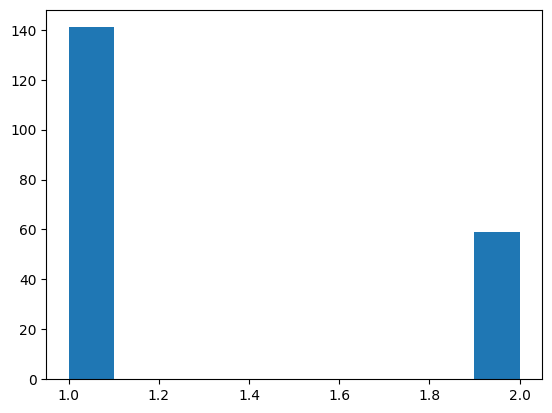

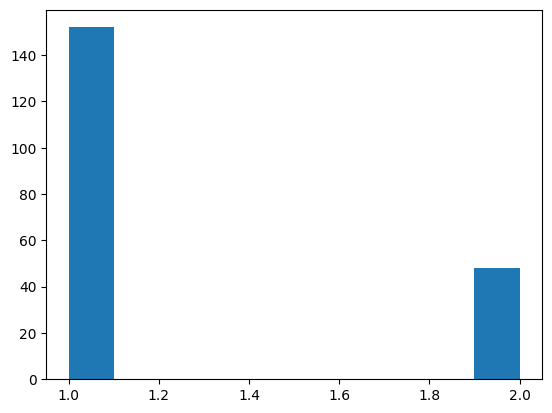

Logistic Regression Accuracy: 79.50%


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logModel = LogisticRegression()
logModel.fit(X_train, np.ravel(y_train.astype(int)))
yPred = logModel.predict(X_test)

# Graph the model
# plt.scatter(X_test, y_test, color='black')
# plt.plot(X_test, yPredicted, color='blue', linewidth=2)
# plt.xlabel('Independent Values', fontsize=14)
# plt.ylabel('Target', fontsize=14)

# Create a bar width
plt.hist(y_test)
plt.show()
plt.hist(yPred)
plt.show()

accuracy = accuracy_score(y_test, yPred)
print(f"Logistic Regression Accuracy: {accuracy*100:.2f}%")

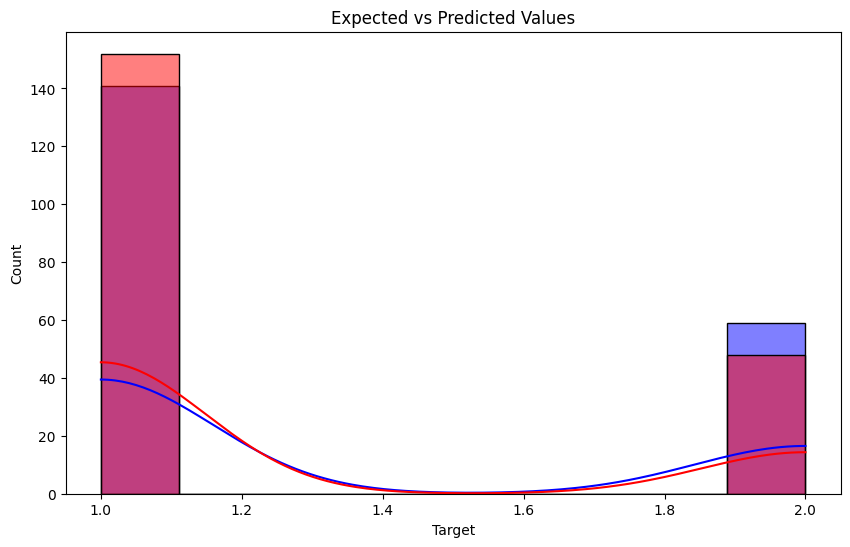

In [ ]:
from typing import Any
import seaborn as sns
yPred = pd.DataFrame(yPred, columns=['Target'])

plt.figure(figsize=(10, 6))
sns.histplot(data=y_test, x='Target', kde=True, color='blue', label='Expected Values')
sns.histplot(data=yPred, x='Target', kde=True, color='red', label='Predicted Values')
plt.title('Expected vs Predicted Values')
plt.xlabel('Target')
plt.show()


# Random Forest Classifier Implementation

In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Create RFC with t trees
t = 200

# Increase weight for class two since it is misclassified more often
class_weights = {1: 1, 2: 2}

# Initialize RandomForestClassifier with class weights
RFC = RandomForestClassifier(n_estimators=t, max_depth=15,
                             min_samples_split=10,
                             min_samples_leaf=1,
                             max_features=0.75,
                             class_weight=class_weights)
# Train
RFC.fit(X_train, np.ravel(y_train.astype(int)))
# Predict
yPredRFC = RFC.predict(X_test)
# testing accuracy and training
training_accuracy = RFC.score(X_train, y_train)
testing_accuracy = RFC.score(X_test, y_test)
print(f"Training Accuracy: {training_accuracy*100:.2f}%")
# Check accuracy of model
accuracy = accuracy_score(y_test, yPredRFC)
print(f"Random Forest Classifier Accuracy: {accuracy*100:.2f}%")

Training Accuracy: 98.12%
Random Forest Classifier Accuracy: 81.50%


Top 10 Most Important Features:


,Feature,Importance
1,Credit amount,0.132098
10,Status of existing checking account_A14,0.121547
4,Age,0.102049
0,Duration,0.082471
7,Status of existing checking account_A11,0.028922
3,Present residence since,0.026283
2,Installment rate in percentage of disposable i...,0.022882
15,Credit history_A34,0.022168
49,Other installment plans_A143,0.020762
16,Purpose_A40,0.016448


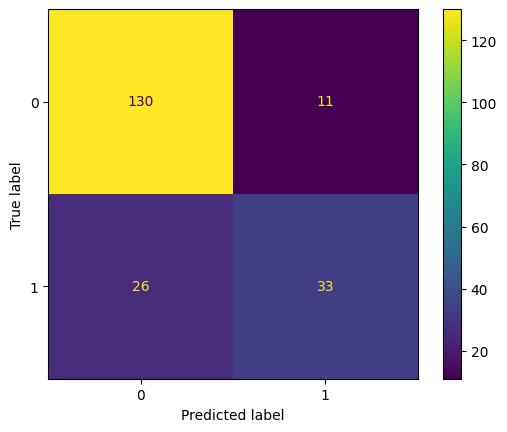





              precision    recall  f1-score   support

           1       0.83      0.92      0.88       141
           2       0.75      0.56      0.64        59

    accuracy                           0.81       200
   macro avg       0.79      0.74      0.76       200
weighted avg       0.81      0.81      0.81       200



In [39]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

# Get feature importance data
importances = RFC.feature_importances_
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
# Display the 10 most important feature
print("Top 10 Most Important Features:")
display(feature_importances.head(10))

print("\n\n\n")

# Create and display confusion matrix
cm = confusion_matrix(y_test, yPredRFC)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

print("\n\n\n")

# Classification report to understand how accurate model is for different labels
report = classification_report(y_test, yPredRFC)
print(report)

# SVM Model Implementation

## kNN Model Implementation

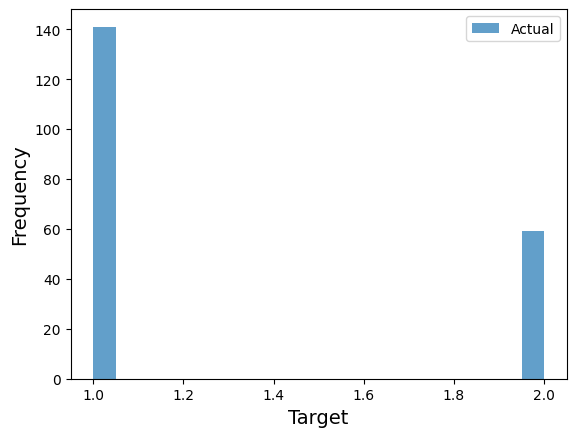

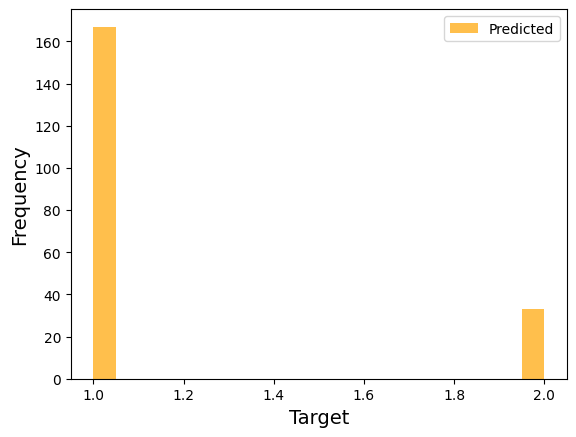

KNN Classifier Accuracy: 75.00%


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

knnModel = KNeighborsClassifier(n_neighbors=5)  # we test different values for n_neighbors.

# when n_neighbors = 5, accuracy = 75.00%
# when n_neighbors = 7, accuracy = 72.50% (accuracy decreased)
# when n_neighbors = 2, accuracy = 71.00% (accuracy decreased)
# when n_neighbors = 1, accuracy = 70.00% (accuracy decreased)
# Therefore, n_neighbors = 5 seems to have the best accuracy.





# Fit the model
knnModel.fit(X_train, np.ravel(y_train.astype(int)))

# Prediction on the test set
yPred = knnModel.predict(X_test)

# Histogram to show the plot
plt.hist(y_test, bins=20, alpha=0.7, label='Actual')
plt.xlabel('Target', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.legend()
plt.show()

plt.hist(yPred, bins=20, alpha=0.7, label='Predicted', color='orange')
plt.xlabel('Target', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.legend()
plt.show()

# Displaying the accuracy of the model.
accuracy = accuracy_score(y_test, yPred)
print(f"KNN Classifier Accuracy: {accuracy * 100:.2f}%")


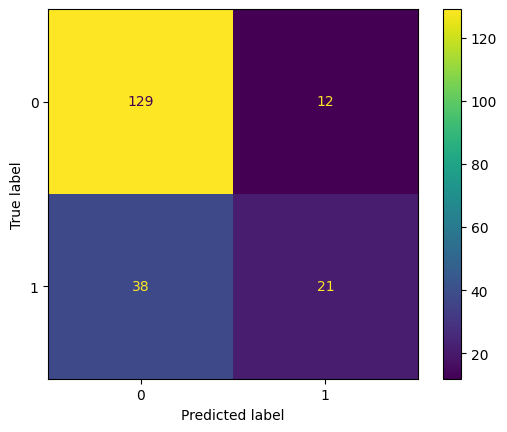





              precision    recall  f1-score   support

           1       0.77      0.91      0.84       141
           2       0.64      0.36      0.46        59

    accuracy                           0.75       200
   macro avg       0.70      0.64      0.65       200
weighted avg       0.73      0.75      0.73       200



In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report


# Create and display confusion matrix
cm = confusion_matrix(y_test, yPred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

print("\n\n\n")

# Classification report to understand how accurate model is for different labels
report = classification_report(y_test, yPred)
print(report)